In [2]:
import pandas as pd
import os
import zipfile
import torch

In [1]:
print("sanity check")

sanity check


In [3]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)


In [2]:
# uncomment only if you want to unzip folder, it is already unzipped now
# with zipfile.ZipFile('./Mammals.zip', 'r') as zip_ref:
#    zip_ref.extractall('')

In [3]:
#import pathlib
#data_dir = pathlib.Path('./Mammals')
#image_count = len(list(data_dir.glob('*/*.jpg')))
#print(image_count)

In [55]:
list_of_classes = [name for name in os.listdir('./Mammals') if os.path.isdir(os.path.join('./Mammals', name))]
#list_of_classes

In [56]:
len(list_of_classes)

246

In [57]:
subset = list_of_classes[2:6]
subset

['04767_Animalia_Chordata_Mammalia_Monotremata_Tachyglossidae_Tachyglossus_aculeatus',
 '04730_Animalia_Chordata_Mammalia_Chiroptera_Vespertilionidae_Perimyotis_subflavus',
 '04691_Animalia_Chordata_Mammalia_Carnivora_Mephitidae_Mephitis_mephitis',
 '04766_Animalia_Chordata_Mammalia_Monotremata_Ornithorhynchidae_Ornithorhynchus_anatinus']

In [58]:
df_mammals = pd.DataFrame()

[len(os.listdir('./Mammals/'+subset[0]))]
print('total training GOAT images:', len(os.listdir('./Mammals/'+subset[0])))

total training GOAT images: 300


In [59]:
list_of_lengths = [len(os.listdir('./Mammals/'+name)) for name in os.listdir('./Mammals') if os.path.isdir(os.path.join('./Mammals', name))]

In [60]:
# list_of_lengths

In [61]:
df_mammals = pd.DataFrame({'class':list_of_classes, 'length': list_of_lengths})

In [62]:
df_mammals.sort_values(by="length",ascending=False)

,class,length
123,04663_Animalia_Chordata_Mammalia_Artiodactyla_...,300
181,04821_Animalia_Chordata_Mammalia_Rodentia_Sciu...,300
145,04637_Animalia_Chordata_Mammalia_Artiodactyla_...,300
146,04626_Animalia_Chordata_Mammalia_Artiodactyla_...,300
148,04751_Animalia_Chordata_Mammalia_Eulipotyphla_...,300
...,...,...
144,04799_Animalia_Chordata_Mammalia_Rodentia_Cric...,168
97,04804_Animalia_Chordata_Mammalia_Rodentia_Cric...,167
17,04732_Animalia_Chordata_Mammalia_Dermoptera_Cy...,167
6,04748_Animalia_Chordata_Mammalia_Eulipotyphla_...,161


In [63]:
df_mammals['family'] = df_mammals['class'].apply(lambda x: x.split('_')[4])
df_mammals['genus'] = df_mammals['class'].apply(lambda x: x.split('_')[5])

In [64]:
df_mammals

,class,length,family,genus
0,04780_Animalia_Chordata_Mammalia_Primates_Cebi...,200,Primates,Cebidae
1,04829_Animalia_Chordata_Mammalia_Rodentia_Sciu...,300,Rodentia,Sciuridae
2,04767_Animalia_Chordata_Mammalia_Monotremata_T...,300,Monotremata,Tachyglossidae
3,04730_Animalia_Chordata_Mammalia_Chiroptera_Ve...,226,Chiroptera,Vespertilionidae
4,04691_Animalia_Chordata_Mammalia_Carnivora_Mep...,300,Carnivora,Mephitidae
...,...,...,...,...
241,04840_Animalia_Chordata_Mammalia_Rodentia_Sciu...,300,Rodentia,Sciuridae
242,04657_Animalia_Chordata_Mammalia_Artiodactyla_...,300,Artiodactyla,Delphinidae
243,04781_Animalia_Chordata_Mammalia_Primates_Cebi...,300,Primates,Cebidae
244,04858_Animalia_Chordata_Mammalia_Sirenia_Trich...,300,Sirenia,Trichechidae


In [65]:
df_mammals.groupby('genus').count().sort_values(by='class')

,class,length,family
genus,,,
Antilocapridae,1,1,1
Geomyidae,1,1,1
Giraffidae,1,1,1
Hippopotamidae,1,1,1
Megalonychidae,1,1,1
...,...,...,...
Cervidae,11,11,11
Mustelidae,12,12,12
Leporidae,12,12,12


In [67]:
df_sorted = df_mammals.groupby('genus')['length'].sum().sort_values(ascending=False)

In [73]:
df_sorted[0]

11604

In [71]:
chosen_subset

array([8054])

In [ ]:
# UNCOMMENT THIS TO SPLIT FOLDERS
# import splitfolders
# splitfolders.ratio('Mammals', output="Mammals_Split", seed=1337, ratio=(.7, 0.1,0.2)) 


#### Merging folders by genus

In [17]:
import shutil

#### Getting the mode of widths and heights

In [19]:
# from PIL import Image
# average_width = 0
# average_height = 0
# counter = 0

# widths = {}
# heights = {}
# for name in os.listdir('./Mammals'):
#     # print(name)
#     if os.path.isdir(os.path.join('./Mammals', name)):
#         for filepath in os.listdir(os.path.join('./Mammals', name)):
#             if os.path.isdir(os.path.join('./Mammals', name)):
#                 try: 
#                     img = Image.open(os.path.join('./Mammals', name, filepath))

#                     widths[img.width] = widths.get(img.width, 0) + 1
#                     heights[img.height] = heights.get(img.height, 0) + 1

#                 except:
#                     counter+=1

In [20]:
# most_common_width = max(widths, key=widths.get) 
# most_common_height = max(heights, key=heights.get) 

In [21]:
# print("The width of the image is: ", most_common_width)
# print("The height of the image is: ", most_common_height)

In [18]:
base_dir = "./Mammals_Split"
train_dir = os.path.join(base_dir, 'train')
validation_dir =os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [23]:
# todo: ADD LATER

# print('total training cat images:', len(os.listdir(train_cats_dir)))
# print('total training dog images:', len(os.listdir(train_dogs_dir)))
# print('total validation cat images:', len(os.listdir(validation_cats_dir)))
# print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
# print('total test cat images:', len(os.listdir(test_cats_dir)))
# print('total test dog images:', len(os.listdir(test_dogs_dir)))

## Building CNN

In [16]:
# import os
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import optimizers
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
# import matplotlib.pyplot as plt
# import pandas as pd

In [20]:
# #from tensorflow.keras import layers
# #from tensorflow.keras import models

# # silvia added dropout to avoid overfitting

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(rate=0.5))   #Dropout layer
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(64, activation='sigmoid'))

# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(learning_rate=1e-4),
#               metrics=['acc'])

#### Building our Model

In [6]:
BATCH_SIZE= 100

In [32]:
#adding data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='categorical')


csv_logger = CSVLogger('training_augmented.log',
                       separator=',', 
                       append=False)


Found 7008 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


In [ ]:
# model.fit?

### Callbacks Setup

In [ ]:
earlystop=EarlyStopping(monitor='val_acc',
                        min_delta=0.001,
                        patience=6,
                        verbose=1,
                        mode='auto')

In [ ]:

csv_logger=CSVLogger('training.log',separator=",",append=False)

In [ ]:
len(os.listdir(train_dir))

### Fitting Model

In [ ]:
history=model.fit(train_generator,
          steps_per_epoch=(48214/BATCH_SIZE), # this is for the training images

          epochs=30, 

          validation_data=validation_generator,
          validation_steps=(6864/BATCH_SIZE),

          callbacks=[earlystop,csv_logger]

          )

## Slightly different model configuration

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir, 
    target_size=(200,200),
    batch_size=BATCH_SIZE
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir, 
    target_size=(200,200),
    batch_size=BATCH_SIZE
)

In [ ]:
#adding data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(200, 200),
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=BATCH_SIZE,
        class_mode='categorical')


csv_logger = CSVLogger('training_augmented.log',
                       separator=',', 
                       append=False)

In [ ]:
# #silvia --> model overfits

# # Creating a Sequential model
# from tensorflow.keras import layers
# from tensorflow.keras import models
# model= models.Sequential()
# model.add(layers.Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
# model.add(layers.Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

# model.add(layers.Flatten())
# model.add(layers.Dropout(rate=0.5)) 
# model.add(layers.Dense(100,activation='relu'))
# model.add(layers.Dense(80,activation='relu'))
# model.add(layers.Dense(64,activation = 'softmax'))
    
# model.compile(
#               loss='categorical_crossentropy', 
#               metrics=['acc'],
#               optimizer='adam'
#              )

In [ ]:
# #silvia --> the model overfits
# history=model.fit(train_generator,
#           steps_per_epoch=(48214/BATCH_SIZE), # this is for the training images

#           epochs=30, 

#           validation_data=validation_generator,
#           validation_steps=(6864/BATCH_SIZE),

#           callbacks=[earlystop,csv_logger]

#           )

In [ ]:
chosen_subset = ['Cercopithecidae','Felidae','Otariidae','Cricetidae']
chosen_subset_3k = ['Leporidae','Mustelidae','Cervidae']

In [ ]:
print('ey')

In [ ]:
pip install torch --quiet

In [ ]:
pip uninstall torch -y

In [ ]:
pip install -U numpy

In [9]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [23]:
# # uncomment only if you want to unzip folder, it is already unzipped now
# with zipfile.ZipFile('./mammals_subset.zip', 'r') as zip_ref:
#    zip_ref.extractall('')

# 3 SELECTED CLASSES

In [97]:
base_dir = "./mammals_subset"
train_dir = os.path.join(base_dir, 'train')
validation_dir =os.path.join(base_dir, 'val')
# test_dir = os.path.join(base_dir, 'test')

In [98]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
from tensorflow.keras.layers import LeakyReLU

In [100]:
import tensorflow as tf

In [101]:
#from tensorflow.keras import layers
#from tensorflow.keras import models

# added dropout to avoid overfitting

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.01), input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2)) 

model.add(layers.Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2)) 

model.add(layers.Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# model.add(layers.Conv2D(256, (3, 3), activation=LeakyReLU(alpha=0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(rate=0.5))   

model.add(layers.Dense(512, activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(rate=0.5))   #Dropout layer


model.add(layers.Dense(100, activation=LeakyReLU(alpha=0.01)))
#model.add(layers.Dense(64, activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [102]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])


# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=optimizers.RMSprop(learning_rate=1e-4),
#               metrics=['acc'])

In [103]:
# #from tensorflow.keras import layers
# #from tensorflow.keras import models

# numberOfClass = 3 
# model = models.Sequential()
# model.add(Conv2D(32,(3,3),input_shape=(150, 150, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D())

# model.add(Conv2D(32,(3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D())

# model.add(Conv2D(64,(3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D())

# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(Dropout(0.5))
# model.add(Dense(numberOfClass)) # output
# model.add(Activation("softmax"))

In [104]:
# model.compile(loss = "categorical_crossentropy",
#               optimizer = "rmsprop",
#               metrics = ["accuracy"])

#### Building our Model

In [105]:
BATCH_SIZE= 100

In [106]:
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir, 
    target_size=(200,200),
    batch_size=BATCH_SIZE
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir, 
    target_size=(200,200),
    batch_size=BATCH_SIZE
)

Found 7028 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


In [107]:
#adding data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(200, 200),
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=BATCH_SIZE,
        class_mode='sparse')


csv_logger = CSVLogger('training_augmented.log',
                       separator=',', 
                       append=False)


Found 7028 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


In [108]:
earlystop=EarlyStopping(monitor='val_acc',
                        min_delta=0.001,
                        patience=6,
                        verbose=1,
                        mode='auto')

csv_logger=CSVLogger('training.log',separator=",",append=False)

In [ ]:
history=model.fit(train_generator,
          steps_per_epoch=(7009/BATCH_SIZE), # this is for the training images

          epochs=50, 

          validation_data=validation_generator,
          validation_steps=(1000/BATCH_SIZE)#,

          #callbacks=[earlystop,csv_logger]
          )

Epoch 1/50
70/70 [==============================] - 91s 1s/step - loss: 1.0857 - acc: 0.3857 - val_loss: 1.0604 - val_acc: 0.4390
Epoch 2/50
70/70 [==============================] - 89s 1s/step - loss: 1.0378 - acc: 0.4506 - val_loss: 1.0339 - val_acc: 0.4370
Epoch 3/50
70/70 [==============================] - 88s 1s/step - loss: 1.0179 - acc: 0.4663 - val_loss: 1.0392 - val_acc: 0.4600
Epoch 4/50
70/70 [==============================] - 88s 1s/step - loss: 1.0192 - acc: 0.4555 - val_loss: 1.0192 - val_acc: 0.4610
Epoch 5/50
70/70 [==============================] - 88s 1s/step - loss: 1.0123 - acc: 0.4816 - val_loss: 1.0245 - val_acc: 0.4680
Epoch 6/50
70/70 [==============================] - 89s 1s/step - loss: 0.9948 - acc: 0.4982 - val_loss: 0.9998 - val_acc: 0.5020
Epoch 7/50
70/70 [==============================] - 89s 1s/step - loss: 0.9935 - acc: 0.4959 - val_loss: 1.0252 - val_acc: 0.4630
Epoch 8/50
70/70 [==============================] - 88s 1s/step - loss: 0.9831 - acc: 0.50

In [ ]:
from tensorflow.keras import models

model.save("CustomNN-5")

In [21]:
# import tensorflow as tf
# model_name = "CustomNN-2" 

# saved_model_path = f"{model_name}"
# tf.saved_model.save(model, saved_model_path)

In [24]:
# IMPORTING OUR SAVED MODEL

import tensorflow as tf
from tensorflow.keras import models

model_name = "CustomNN-3" 
imported = models.load_model(model_name)

In [25]:
history = imported.fit(train_generator,
          steps_per_epoch=(7009/BATCH_SIZE), # this is for the training images
          epochs=5, 
          validation_data=validation_generator,
          validation_steps=(1000/BATCH_SIZE)
          )

Epoch 1/5
70/70 [==============================] - 90s 1s/step - loss: 0.9593 - acc: 0.5322 - val_loss: 0.9578 - val_acc: 0.5450
Epoch 2/5
70/70 [==============================] - 88s 1s/step - loss: 0.9457 - acc: 0.5461 - val_loss: 0.9684 - val_acc: 0.5220
Epoch 3/5
70/70 [==============================] - 88s 1s/step - loss: 0.9397 - acc: 0.5519 - val_loss: 0.9453 - val_acc: 0.5330
Epoch 4/5
70/70 [==============================] - 88s 1s/step - loss: 0.9305 - acc: 0.5575 - val_loss: 0.9263 - val_acc: 0.5640
Epoch 5/5
70/70 [==============================] - 88s 1s/step - loss: 0.9268 - acc: 0.5646 - val_loss: 0.9534 - val_acc: 0.5390


In [27]:
# history=imported.fit(train_generator,
#           steps_per_epoch=(7009/BATCH_SIZE), # this is for the training images

#           epochs=30, 

#           validation_data=validation_generator,
#           validation_steps=(1000/BATCH_SIZE),

#           callbacks=[earlystop,csv_logger]
#           )

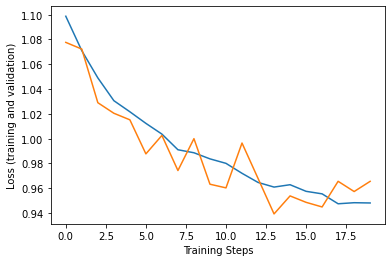

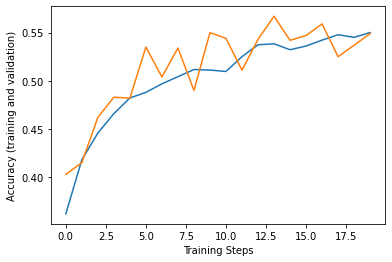

In [80]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
#plt.ylim([0,2])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
#plt.ylim([0,1])
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

In [31]:
import math
import numpy as np
import seaborn as sns

In [32]:
# test_batches = validation_datagen.flow_from_directory( batch_size=n)
number_of_examples = len(validation_generator.filenames)
# number_of_examples
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * BATCH_SIZE)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(validation_generator[i][1]))

In [33]:
import numpy as np
rounded_labels=np.argmax(test_labels, axis=1)
rounded_labels[1]
# 2

2

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = model.predict(validation_generator)
# true_classes=df['label']
print('Confusion Matrix')
cm=confusion_matrix(rounded_labels,Y_pred.argmax(axis=1))
cm

10/10 [==============================] - 4s 403ms/step
Confusion Matrix


array([[131, 168,  30],
       [ 37, 284,  17],
       [ 53, 146, 134]])

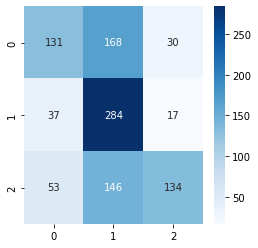

In [35]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()

In [44]:
true_labels = validation_generator.classes
predictions = model.predict_generator(validation_generator)


<ipython-input-44-76bc6bb13dbf>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


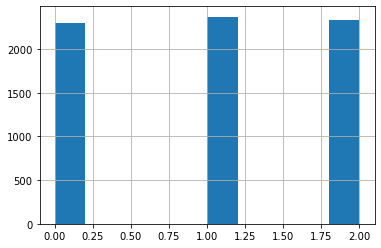

In [47]:
pd.Series(train_generator.classes).hist();

In [37]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [40]:

import sklearn 
cm = sklearn.metrics.confusion_matrix(y_true, y_pred)


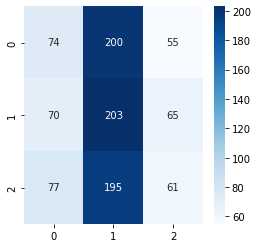

In [41]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()

### Transfer Learning

In [ ]:
# Transfer learning: 
# Because with transfer learning, you begin with an existing (trained) neural network 
# used for image recognition — and then tweak it a bit (or more) here and there to train a 
# model for your particular use case. 
# And why do we do that? Training a reasonable neural network would mean needing approximately 
# 300,000 image samples, and to achieve really good performance, we’re going to need at least a 
# million images.
# https://www.kaggle.com/code/arbazkhan971/image-classification-using-cnn-94-accuracy


In [ ]:
# !pip uninstall fastai -y

In [ ]:
pip install -c fastchan fastai

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))